In [1]:
import scipy.io
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline
%config InlineBackend.figure_formats = set(['retina'])

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [2]:
data = scipy.io.loadmat("Accelerometer_data.mat")
print(data.keys())

x_train = np.hstack((data['train']['ax'][0,0], 
                     data['train']['ay'][0,0], 
                     data['train']['az'][0,0]))
y_train = data['train']['Y'][0,0].reshape(-1)

x_test = np.hstack((data['test']['ax'][0,0], 
                    data['test']['ay'][0,0], 
                    data['test']['az'][0,0]))
y_test = data['test']['Y'][0,0].reshape(-1)

actnames = ['Walking', 'Upstairs', 'Downstairs', 'Sitting', 'Standing', 'Laying']

dict_keys(['__header__', '__version__', '__globals__', 'actnames', 'fs', 'test', 'train'])


### Discrete Cosine Transform

In [7]:
from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft

def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])

def dct_trans_dataset(y):
    y_dct = np.zeros(y.shape)
    for i in range(y.shape[0]):
        y_dct[i,:] = dct(y[i,:])
    return y_dct

In [11]:
x_train_dct = dct_trans_dataset(x_train)
x_test_dct = dct_trans_dataset(x_test)

Example:

In [12]:
clf1 = KNeighborsClassifier(n_neighbors = 1, algorithm="brute")
clf1.fit(x_train_dct, y_train)
y_pred_1 = clf1.predict(x_test_dct)
print('Accuracy for k=1: ' + str(accuracy_score(y_test, y_pred_1)))

Accuracy for k=1: 0.7152103559870551


### Wavelet transform

In [3]:
import pywt

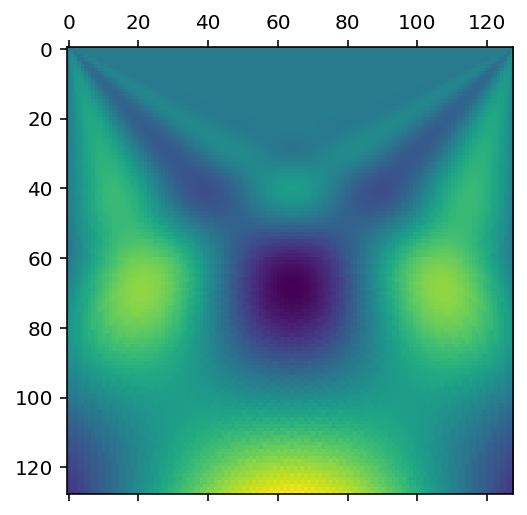

In [28]:
coef, freqs = pywt.cwt(x_train[0,:128], np.arange(1,129), 'morl')
plt.matshow(coef) 
plt.show()

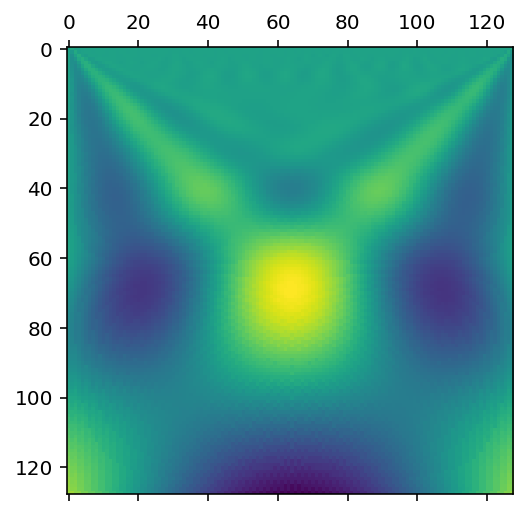

In [30]:
coef, freqs = pywt.cwt(x_train[0,128:256], np.arange(1,129), 'morl')
plt.matshow(coef) 
plt.show()

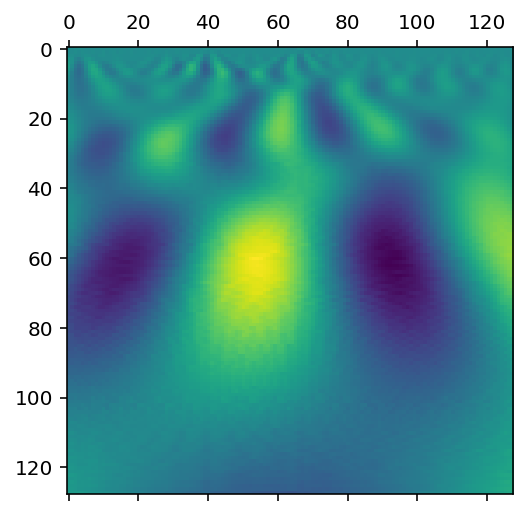

In [31]:
coef, freqs = pywt.cwt(x_train[100,256:], np.arange(1,129), 'morl')
plt.matshow(coef) 
plt.show()

In [32]:
coef.shape


(128, 128)

In [4]:
def wt_trans_dataset(y):
    y_dct = np.zeros((y.shape[0], 128*128*3))
    for i in range(y.shape[0]):
        y_wt_x, _ = pywt.cwt(y[i,:128], np.arange(1,129), 'morl')
        y_wt_y, _ = pywt.cwt(y[i,128:256], np.arange(1,129), 'morl')
        y_wt_z, _ = pywt.cwt(y[i,256:], np.arange(1,129), 'morl')
        y_dct[i,:] = np.hstack((y_wt_x.reshape(-1), y_wt_y.reshape(-1), y_wt_z.reshape(-1)))
    return y_dct

In [5]:
x_train_wt = wt_trans_dataset(x_train)

In [6]:
x_test_wt = wt_trans_dataset(x_test)

Example:

In [41]:
from sklearn.svm import NuSVC
clf_SVM = NuSVC(gamma='scale')
clf_SVM.fit(x_train_wt, y_train)
y_pred_SVM = clf_SVM.predict(x_test_wt)
print('Accuracy for SVM: ' + str(accuracy_score(y_test, y_pred_SVM)))

Accuracy for SVM: 0.8203883495145631
